# 2.二次元配列と勾配問題


機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。

この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

### 【問題1】1次関数
x
 が-50から50の範囲で次の式を考えます。

y=1/2 *x +1

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。


In [2]:
import numpy as np

k= 0.1
x = np.arange(-50,50+k,k)
print(x)
print(type(x))

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
<class 'numpy.ndarray'>


In [3]:
x8 = np.array(x)
print(x8.shape)


(1001,)


In [4]:
y = x / 2 + 1
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(1001,)


In [5]:
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
print(x)

[[-50. ]
 [-49.9]
 [-49.8]
 ...
 [ 49.8]
 [ 49.9]
 [ 50. ]]


### 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [6]:
x_y = np.hstack((x,y))
x_y.shape

(1001, 2)

### 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [7]:
# x no hennkaryou
x_con = 0.1

y_con = y[1:] - y[:-1]
print(y)

[[-24.  ]
 [-23.95]
 [-23.9 ]
 ...
 [ 25.9 ]
 [ 25.95]
 [ 26.  ]]


gradient = y no  hennkaryou / x no hennkaryou

In [24]:
gradient = y_con / x_con
#koubai 0.5
#print(gradient)
print(gradient.shape)

(1000, 1)


《注意》

厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

### 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation

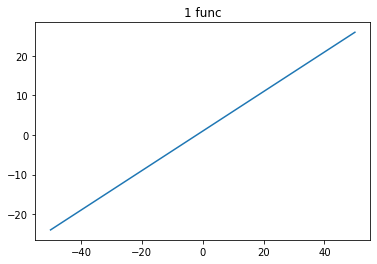

In [25]:
import matplotlib.pyplot as plt

plt.title("1 func")
plt.plot(x,y)
plt.show()

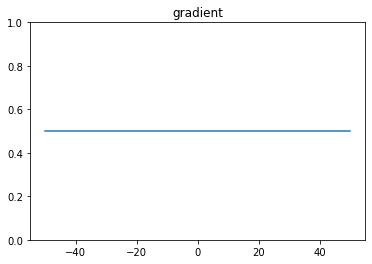

In [35]:
x1 = x[:-1]

plt.plot(x1,gradient[:,0])
plt.ylim(0,1)
plt.title("gradient")
plt.show()

問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。

そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。
$$
y=x^2
$$
$$
y=2x^2 + 2^x
$$
$$
y=sin(x^1/2)
$$


また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

numpy.sin — NumPy v1.16 Manual

《雛形》


In [36]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
        Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    np.arange()の引数と同じ方法で範囲を指定する。
    """
    x = np.arange(*x_range) #youtyousa
    x1 = x.reshape(len(x),1)
    y1 = function(x1)
    x1_con = x1[1:] - x1[:-1]
    y1_con = y1[1:] - y1[:-1]
    #x2 = x1[1:]
    gradient = y1_con / x1_con
    array_xy = np.hstack((x1,y1))
    
    return array_xy, gradient,y1


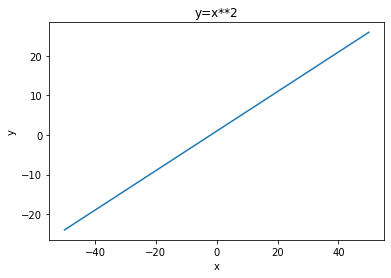

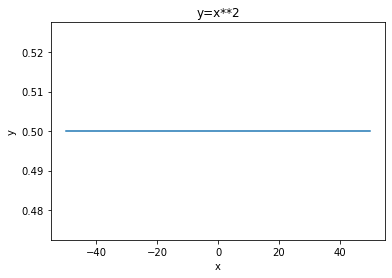

In [37]:
def function0(array_x):

    return array_x/2 + 1

array_xy2, gradient, y5 = compute_gradient(function0)
#print(gradient[:,0])

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])
plt.show()

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:-1, 0], gradient[:, 0])
plt.show()

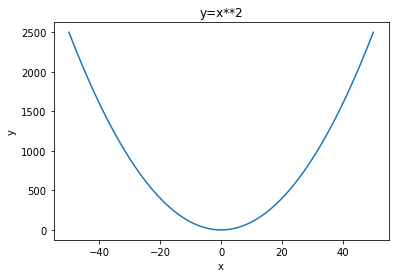

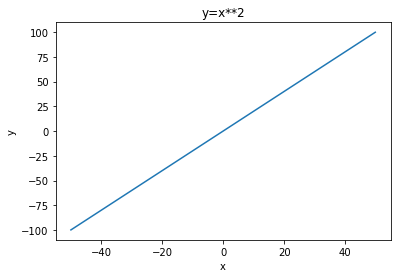

In [38]:
def function1(array_x):

    return array_x**2

array_xy2, gradient, y5 = compute_gradient(function1)
#print(gradient[:,0])

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])
plt.show()

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:-1, 0], gradient[:, 0])
plt.show()

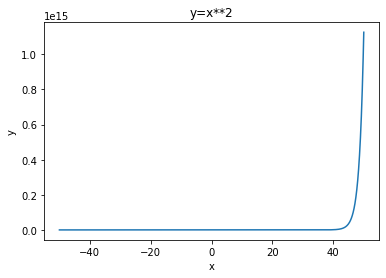

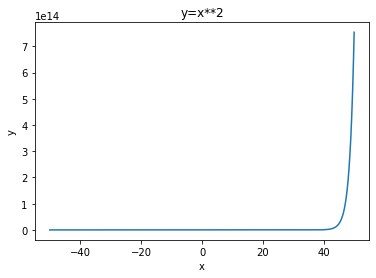

In [39]:
def function2(array_x):

    return 2 * array_x**2 + 2**array_x
array_xy2, gradient, y5 = compute_gradient(function2)
#print(gradient[:,0])

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])
plt.show()

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:-1, 0], gradient[:, 0])
plt.show()

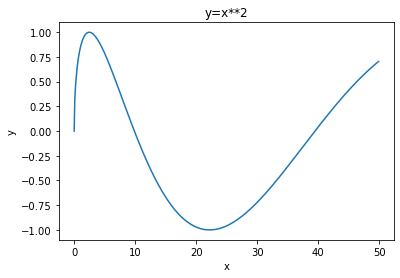

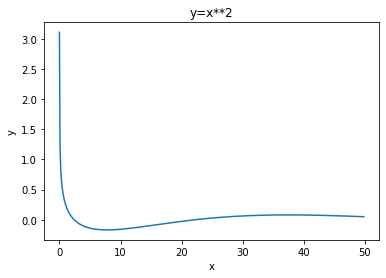

In [40]:
def function3(array_x):

    return np.sin(array_x**0.5)
array_xy2, gradient, y5 = compute_gradient(function3,(0,50,0.1))
#print(gradient[:,0])

#print(array_xy2[:,1])

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])
plt.show()

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:-1, 0], gradient[:, 0])
plt.show()

### 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

In [41]:
# x/2 +1
s_min0,xi0,yj0 = compute_gradient(function0)
print(np.min(yj0))
print(np.argmin(yj0))
print(xi0[0:2])

-24.0
0
[[0.5]
 [0.5]]


In [42]:
# x^2
s_min1,xi1,yj1 = compute_gradient(function1)
print(np.min(yj1))
print(np.argmin(yj1))
print(xi1[499:502])

5.048709793414476e-25
500
[[-0.1]
 [ 0.1]
 [ 0.3]]


In [43]:
#2 * x^2 + 2^x
s_min2,xi2,yj2 = compute_gradient(function2)
print(np.min(yj2))
print(np.argmin(yj2))
print(xi2[497:500])

0.9505505632959851
498
[[-0.41701833]
 [ 0.02482428]
 [ 0.46967008]]


In [44]:
#sinx
s_min3,xi3,yj3 = compute_gradient(function3,(0,50,0.1))
print(np.min(yj3))
print(np.argmin(yj3))
print(xi3[221:224])

-0.9999997540298113
222
[[-0.00063884]
 [ 0.00048745]
 [ 0.00160612]]
